# Problem Statement

Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Solution

### General and domain knowledge assumption

This problem statement relates to banking and financial sector. For time being let us forget about data set(though we know source and content) and assumes few things.

What can be the people's age in data set? We do not know from which region of the world this data belongs. But since it is bancking and financial domain we would have verified & authenticated users having a min age of 18 or 21 years age mostly and upper limit would be around ~100.

Knowing from the past experience of working with banking data set we know that their experience, salary, loan, cc expenditure are some inputs what we can expect to encounter in new data set and can heavily weight on the outcome of output variable which we need to predict.

We also need to consider the profession of an individual whom we are considering as input data. A person with high income usually invest in more than one financial domain but still has a good change of being among the people appling for deposit.

People with low and mid level of income range are very particular about investment and tend to trust banks more rather than investing in other places but as we do encounter outliers in our data set, there are certain inputs in this group of people that would still go and invest in places other than banks. Usually risk takers.

Our final outcome would be predecition for an individual whether he would be interested in term deposit or not, but why are we takling too much about investment. Well, there is inverse relation between investment and term deposit. Its a contradiction, deposit is also as investment, but if an individual is investing more on other investment plans than naturally his investment in term deposit would be fairly less.

### Existing Algorithms and approaches

Since it is binary prediction problem based on number of input we already have few approaches in mind like NB Classifier, kNN. Logistic regression also seems a good fit for this. We have little more dimensions to consider 17+ we can even consider random fores with variable and random dimensions.

### General Imports

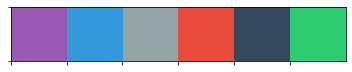

In [1]:
#Import Necessary Libraries

# NumPy: For mathematical funcations, array, matrices operations
import numpy as np 

# Graph: Plotting graphs and other visula tools
import pandas as pd
import seaborn as sns

# sns.set_palette("muted")
# sns.set(color_codes=True)
# sns.color_palette("colorblind", 10)


# color_palette = sns.color_palette()
# To enable inline plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline


# palette = sns.color_palette("muted")

# sns.set_palette(palette)

# sns.palplot(palette)

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.set_palette(flatui)

sns.palplot(sns.color_palette())

In [2]:
# Custom terminal printer

#Lets try to print unique values from object data type
from IPython.display import Markdown, display

def printTextAsMarkdown(title, content, color=None):
    if title is None:
        colorStr = "<span style='color:{}'>{}</span>".format(color, content)
    else:    
        colorStr = "**<span style='color:{}'>{}</span>** : {}".format(color, title, content)
        
    display(Markdown(colorStr))

In [3]:
# Load data set
# Import CSV data using pandas data frame
df_original = pd.read_csv('bank-full.csv')

# Print total columns
print("Total Colums in dataframe: ", len(df_original.columns))

# Prepare columns names
df_original_columns = []
for column in df_original.columns:
    df_original_columns.append(column)


    
print("Columns list {}".format(df_original_columns))
print("***********************************************************************************************************************")

# Prepare mapping of column names for quick access
df_original_columns_map = {}
map_index: int = 0
for column in df_original_columns:
    df_original_columns_map[map_index] = column
    map_index = map_index + 1
    
print("Columns Map {}".format(df_original_columns_map))

# We have separated out columns and its mapping from data, at any point of time during data analysis or cleaning we 
# can directly refer or get data from either index or column identifier



Total Colums in dataframe:  17
Columns list ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']
***********************************************************************************************************************
Columns Map {0: 'age', 1: 'job', 2: 'marital', 3: 'education', 4: 'default', 5: 'balance', 6: 'housing', 7: 'loan', 8: 'contact', 9: 'day', 10: 'month', 11: 'duration', 12: 'campaign', 13: 'pdays', 14: 'previous', 15: 'poutcome', 16: 'Target'}


In [4]:
# Data frame general analysis
df_original.head(16)

age           job   marital  education default  balance housing loan  \
0    58    management   married   tertiary      no     2143     yes   no   
1    44    technician    single  secondary      no       29     yes   no   
2    33  entrepreneur   married  secondary      no        2     yes  yes   
3    47   blue-collar   married    unknown      no     1506     yes   no   
4    33       unknown    single    unknown      no        1      no   no   
5    35    management   married   tertiary      no      231     yes   no   
6    28    management    single   tertiary      no      447     yes  yes   
7    42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8    58       retired   married    primary      no      121     yes   no   
9    43    technician    single  secondary      no      593     yes   no   
10   41        admin.  divorced  secondary      no      270     yes   no   
11   29        admin.    single  secondary      no      390     yes   no   
12   53    technician   married  secondary      no        6     yes   no   
13   58    technician   married    unknown      no       71     yes   no   
14   57      services   married  secondary      no      162     yes   no   
15   51       retired   married    primary      no      229     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome Target  
0   unknown    5   may       261         1     -1         0  unknown     no  
1   unknown    5   may       151         1     -1         0  unknown     no  
2   unknown    5   may        76         1     -1         0  unknown     no  
3   unknown    5   may        92         1     -1         0  unknown     no  
4   unknown    5   may       198         1     -1         0  unknown     no  
5   unknown    5   may       139         1     -1         0  unknown     no  
6   unknown    5   may       217         1     -1         0  unknown     no  
7   unknown    5   may       380         1     -1         0  unknown     no  
8   unknown    5   may        50         1     -1         0  unknown     no  
9   unknown    5   may        55         1     -1         0  unknown     no  
10  unknown    5   may       222         1     -1         0  unknown     no  
11  unknown    5   may       137         1     -1         0  unknown     no  
12  unknown    5   may       517         1     -1         0  unknown     no  
13  unknown    5   may        71         1     -1         0  unknown     no  
14  unknown    5   may       174         1     -1         0  unknown     no  
15  unknown    5   may       353         1     -1         0  unknown     no

In [5]:
# Dataframe information
# Lets analyse data based on following conditions
# 1. Check whether all rows x colums are loaded as given in question, all data must match before we start to even operate on it.
# 2. Print shape of the data
# 8. Check data types of each field
# 3. Find presence of null or missing values.
# 4. Visually inspect data and check presense of Outliers if there are any and see are 
#    they enough to drop or need to consider during model building
# 5. Print shape of the data
# 6. Do we need to consider all data columns given in data set for model building
# 7. Find Corr, median, mean, std deviation, min, max for columns.

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We cannot use this raw data set as it is, as it container flelds which are of type object.
This data is usually in the form of string and we should be able to get categories out of this obect type. 

In [6]:
# data types

df_original.dtypes

# also part of info indicating which are int nd object type though redundant.

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
# Check presence of any null values

df_original.isnull().values.any()

# This return `False` it mean we do no have any present of null values

False

In [8]:
# Check presence of missing value
    
df_original.isna().values.any()

# This return `False` it mean we do no have any present of missing values

False

In [9]:
# Shape of the data

df_original.shape

# we have 45211 rows and 17 columns

(45211, 17)

In [10]:
# Check data loading and analyse data description

df_original.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [11]:
# Print Different data types from dataframe and its reference type

df_original.dtypes.value_counts()


object    10
int64      7
dtype: int64

As we see, only 7 colums have been loaded and rest 10 are missing from here. These seems to be categorical column and hence we need to convert them in numerical columns.

Before we move on to converting these values into categorical variable lets examine what are these values.
This can be done by checking unique and unique count on that columns.


In [12]:
# Print unique for each column

for name in df_original_columns:    
    if df_original[name].dtype == np.int64:
        #Sorting for better understanding
        sortedCategories =sorted(df_original[name].unique().tolist())
        
        formattedText = "has unique data in this range {}".format(sortedCategories)
        
        printTextAsMarkdown(name, formattedText, color="red")
        print("\n**************************************************************************************")

**<span style='color:red'>age</span>** : has unique data in this range [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]


**************************************************************************************


**<span style='color:red'>balance</span>** : has unique data in this range [-8019, -6847, -4057, -3372, -3313, -3058, -2827, -2712, -2604, -2282, -2122, -2093, -2082, -2049, -1980, -1968, -1965, -1944, -1941, -1884, -1882, -1854, -1818, -1781, -1779, -1746, -1737, -1730, -1725, -1701, -1680, -1668, -1664, -1661, -1655, -1636, -1629, -1621, -1613, -1601, -1598, -1586, -1547, -1545, -1531, -1500, -1493, -1490, -1489, -1485, -1480, -1459, -1455, -1451, -1445, -1415, -1414, -1400, -1386, -1385, -1379, -1361, -1350, -1336, -1329, -1322, -1317, -1313, -1312, -1310, -1300, -1272, -1270, -1249, -1246, -1232, -1224, -1217, -1212, -1206, -1202, -1196, -1193, -1185, -1176, -1168, -1164, -1161, -1157, -1148, -1139, -1137, -1136, -1129, -1124, -1122, -1112, -1110, -1105, -1099, -1092, -1091, -1089, -1085, -1083, -1080, -1076, -1053, -1050, -1049, -1042, -1041, -1040, -1038, -1036, -1034, -1027, -1026, -1019, -1014, -1013, -1011, -1007, -1006, -1002, -1001, -999, -998, -997, -995, -994, -988, -985, -983, -982, -980, -978, -976, -974, -972, -971, -970, -969, -967, -966, -962, -961, -954, -948, -947, -946, -942, -940, -939, -938, -934, -933, -932, -931, -930, -923, -921, -918, -910, -905, -901, -898, -896, -895, -892, -890, -888, -887, -886, -880, -879, -876, -874, -872, -871, -870, -869, -868, -867, -865, -864, -861, -859, -854, -853, -852, -849, -848, -847, -846, -839, -838, -835, -834, -832, -825, -824, -820, -817, -816, -813, -812, -811, -810, -808, -806, -805, -804, -803, -800, -799, -797, -796, -790, -786, -782, -780, -779, -777, -771, -770, -769, -768, -767, -762, -759, -757, -755, -754, -753, -752, -750, -749, -747, -745, -744, -742, -741, -740, -738, -736, -735, -732, -731, -728, -725, -723, -722, -720, -718, -717, -715, -714, -713, -711, -710, -709, -708, -706, -705, -704, -703, -701, -700, -697, -694, -692, -691, -690, -689, -688, -687, -686, -685, -684, -683, -682, -681, -680, -679, -677, -676, -675, -674, -673, -672, -671, -670, -667, -666, -665, -664, -663, -661, -659, -656, -651, -650, -648, -646, -644, -643, -642, -641, -640, -639, -637, -636, -635, -634, -633, -632, -631, -630, -628, -627, -626, -625, -624, -621, -619, -618, -617, -616, -614, -613, -612, -611, -609, -608, -607, -606, -605, -603, -601, -600, -599, -598, -597, -596, -594, -593, -591, -589, -588, -587, -585, -584, -583, -582, -581, -580, -579, -578, -577, -576, -575, -574, -572, -571, -570, -569, -568, -566, -565, -564, -563, -562, -560, -559, -558, -557, -556, -555, -554, -553, -552, -551, -550, -549, -548, -547, -546, -545, -544, -542, -541, -540, -538, -537, -535, -534, -533, -532, -531, -530, -529, -528, -527, -526, -525, -524, -523, -522, -521, -519, -518, -517, -516, -515, -513, -512, -511, -510, -509, -508, -507, -506, -505, -504, -503, -502, -501, -500, -499, -498, -497, -496, -495, -494, -493, -492, -491, -490, -489, -488, -487, -485, -483, -482, -481, -480, -479, -478, -477, -476, -475, -474, -473, -472, -471, -470, -469, -468, -467, -466, -465, -464, -463, -462, -461, -460, -459, -458, -457, -456, -455, -454, -453, -452, -451, -450, -449, -448, -447, -446, -444, -443, -442, -441, -440, -439, -438, -437, -436, -435, -433, -432, -431, -430, -429, -428, -427, -426, -424, -423, -422, -421, -420, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -386, -385, -384, -383, -382, -381, -380, -379, -378, -376, -375, -374, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331, -330, -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -269, -268, -267, -266, -265, -264, -263, -262, -261, -260, -259, -258, -257, -256, -255, -254, -253, -252, -251, -250, -249, -248, -247, -246, -245, -244, -243, -242, -241, -240, -239, -238, -237, -236, -235, -234, -233, -232, -231, -230, -229, -228, -227, -226, -225, -224, -223, -222, -221, -220, -219, -218, -217, -216, -215, -214, -213, -212, -211, -210, -209, -208, -207, -206, -205, -204, -203, -202, -201, -200, -199, -198, -197, -196, -195, -194, -193, -192, -191, -190, -189, -188, -187, -186, -185, -184, -183, -182, -181, -180, -179, -178, -177, -176, -175, -174, -173, -172, -171, -170, -169, -168, -167, -166, -165, -164, -163, -162, -161, -160, -159, -158, -157, -156, -155, -154, -153, -152, -151, -150, -149, -148, -147, -146, -145, -144, -143, -142, -141, -140, -139, -138, -137, -136, -135, -134, -133, -132, -131, -130, -129, -128, -127, -126, -125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104, -103, -102, -101, -100, -99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1653, 1654, 1655, 1656, 1657, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1749, 1750, 1751, 1752, 1753, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1790, 1791, 1792, 1794, 1795, 1796, 1797, 1798, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2030, 2031, 2032, 2033, 2034, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2050, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2076, 2077, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2176, 2177, 2178, 2179, 2180, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2287, 2288, 2289, 2290, 2291, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2315, 2316, 2317, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2374, 2376, 2377, 2378, 2380, 2381, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2436, 2437, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2447, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2493, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2505, 2506, 2507, 2508, 2509, 2511, 2512, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2561, 2562, 2564, 2565, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2603, 2604, 2605, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2635, 2636, 2637, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2650, 2651, 2652, 2653, 2655, 2656, 2657, 2658, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2739, 2740, 2741, 2743, 2744, 2745, 2746, 2747, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2772, 2774, 2775, 2776, 2777, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2793, 2794, 2795, 2796, 2798, 2799, 2800, 2801, 2802, 2803, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2825, 2827, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2840, 2841, 2843, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2868, 2869, 2870, 2873, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2889, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2899, 2900, 2901, 2903, 2904, 2906, 2907, 2908, 2909, 2910, 2911, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2944, 2945, 2946, 2948, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2967, 2968, 2969, 2970, 2971, 2972, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3002, 3003, 3004, 3006, 3007, 3008, 3009, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3041, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3079, 3080, 3082, 3083, 3086, 3087, 3090, 3091, 3092, 3094, 3095, 3096, 3097, 3098, 3100, 3102, 3103, 3104, 3105, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3117, 3118, 3119, 3120, 3122, 3123, 3126, 3127, 3129, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3148, 3149, 3150, 3151, 3154, 3155, 3156, 3157, 3158, 3160, 3161, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3172, 3173, 3175, 3176, 3177, 3178, 3180, 3181, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3194, 3195, 3196, 3197, 3198, 3199, 3201, 3202, 3203, 3204, 3206, 3207, 3208, 3211, 3213, 3214, 3215, 3216, 3217, 3219, 3220, 3221, 3222, 3224, 3226, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3246, 3247, 3249, 3250, 3252, 3253, 3254, 3255, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3266, 3267, 3268, 3269, 3270, 3271, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3293, 3294, 3295, 3296, 3297, 3298, 3300, 3301, 3302, 3303, 3304, 3305, 3307, 3308, 3309, 3310, 3311, 3313, 3314, 3315, 3316, 3317, 3321, 3322, 3323, 3324, 3326, 3327, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3337, 3338, 3339, 3340, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3352, 3353, 3354, 3355, 3357, 3358, 3360, 3361, 3362, 3363, 3364, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3376, 3377, 3379, 3381, 3382, 3384, 3386, 3387, 3388, 3390, 3391, 3392, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3436, 3438, 3440, 3442, 3443, 3444, 3445, 3446, 3450, 3451, 3452, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3478, 3480, 3481, 3485, 3486, 3487, 3490, 3492, 3493, 3494, 3495, 3496, 3498, 3499, 3500, 3501, 3503, 3504, 3505, 3507, 3508, 3510, 3511, 3512, 3514, 3516, 3517, 3518, 3519, 3520, 3524, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3536, 3537, 3538, 3540, 3542, 3544, 3545, 3546, 3547, 3549, 3550, 3551, 3552, 3554, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3567, 3568, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3594, 3595, 3598, 3601, 3603, 3604, 3605, 3608, 3610, 3611, 3612, 3615, 3616, 3620, 3622, 3623, 3624, 3625, 3626, 3628, 3629, 3630, 3632, 3634, 3635, 3636, 3638, 3640, 3641, 3643, 3644, 3646, 3648, 3649, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3662, 3663, 3664, 3665, 3669, 3670, 3671, 3672, 3674, 3675, 3676, 3677, 3679, 3680, 3681, 3684, 3685, 3687, 3688, 3689, 3690, 3693, 3694, 3695, 3696, 3698, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3708, 3710, 3711, 3713, 3714, 3715, 3717, 3718, 3720, 3721, 3722, 3723, 3724, 3726, 3727, 3728, 3729, 3730, 3732, 3733, 3735, 3736, 3737, 3738, 3739, 3740, 3743, 3744, 3745, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3756, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3773, 3774, 3776, 3777, 3778, 3779, 3780, 3782, 3783, 3784, 3786, 3790, 3791, 3792, 3794, 3795, 3796, 3797, 3798, 3800, 3803, 3805, 3806, 3809, 3810, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3823, 3824, 3825, 3827, 3829, 3831, 3832, 3834, 3837, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3848, 3849, 3850, 3851, 3854, 3855, 3856, 3857, 3858, 3859, 3862, 3863, 3864, 3867, 3868, 3869, 3870, 3872, 3873, 3874, 3875, 3876, 3877, 3881, 3884, 3885, 3886, 3888, 3889, 3895, 3897, 3899, 3902, 3904, 3905, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3921, 3923, 3924, 3926, 3927, 3929, 3931, 3932, 3933, 3935, 3936, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3957, 3959, 3960, 3962, 3965, 3967, 3969, 3970, 3972, 3973, 3975, 3977, 3981, 3982, 3984, 3986, 3988, 3990, 3992, 3993, 3994, 3995, 3997, 3998, 3999, 4000, 4003, 4004, 4005, 4006, 4007, 4009, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4020, 4022, 4023, 4024, 4025, 4028, 4030, 4031, 4037, 4038, 4039, 4040, 4041, 4043, 4044, 4045, 4046, 4047, 4048, 4050, 4053, 4054, 4056, 4060, 4062, 4063, 4064, 4066, 4068, 4069, 4070, 4071, 4073, 4075, 4079, 4080, 4082, 4083, 4084, 4086, 4087, 4089, 4091, 4092, 4094, 4095, 4096, 4099, 4101, 4103, 4104, 4105, 4108, 4110, 4111, 4112, 4116, 4117, 4118, 4119, 4120, 4121, 4123, 4124, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4151, 4152, 4153, 4157, 4158, 4162, 4166, 4168, 4170, 4173, 4174, 4176, 4177, 4178, 4182, 4185, 4186, 4189, 4190, 4191, 4194, 4196, 4198, 4200, 4204, 4207, 4209, 4210, 4211, 4213, 4216, 4222, 4223, 4227, 4229, 4230, 4231, 4232, 4233, 4235, 4236, 4239, 4240, 4243, 4244, 4246, 4247, 4248, 4253, 4254, 4256, 4259, 4260, 4262, 4263, 4264, 4265, 4266, 4269, 4274, 4276, 4278, 4279, 4280, 4281, 4283, 4286, 4287, 4289, 4290, 4291, 4293, 4294, 4295, 4297, 4298, 4299, 4300, 4301, 4303, 4305, 4306, 4307, 4309, 4311, 4312, 4313, 4314, 4315, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4328, 4329, 4330, 4331, 4332, 4333, 4335, 4336, 4339, 4341, 4343, 4344, 4348, 4353, 4354, 4357, 4358, 4359, 4362, 4365, 4366, 4367, 4369, 4370, 4372, 4373, 4374, 4378, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4399, 4401, 4402, 4403, 4404, 4406, 4408, 4409, 4411, 4412, 4413, 4414, 4415, 4416, 4418, 4420, 4424, 4425, 4428, 4430, 4432, 4434, 4436, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4450, 4451, 4453, 4455, 4457, 4458, 4459, 4460, 4461, 4463, 4464, 4465, 4466, 4468, 4471, 4475, 4477, 4478, 4480, 4481, 4482, 4487, 4488, 4490, 4492, 4493, 4495, 4497, 4499, 4500, 4503, 4504, 4505, 4508, 4509, 4512, 4513, 4515, 4517, 4519, 4520, 4522, 4527, 4531, 4533, 4535, 4536, 4537, 4539, 4541, 4542, 4543, 4544, 4545, 4547, 4554, 4556, 4557, 4558, 4561, 4562, 4564, 4565, 4567, 4568, 4570, 4572, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4596, 4597, 4599, 4601, 4602, 4605, 4606, 4608, 4610, 4612, 4613, 4617, 4619, 4622, 4623, 4629, 4630, 4634, 4635, 4636, 4638, 4639, 4641, 4642, 4644, 4645, 4646, 4647, 4648, 4649, 4654, 4655, 4656, 4657, 4659, 4660, 4661, 4664, 4665, 4666, 4667, 4674, 4675, 4676, 4680, 4681, 4683, 4684, 4687, 4688, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4700, 4707, 4708, 4709, 4711, 4712, 4713, 4714, 4716, 4717, 4718, 4719, 4720, 4721, 4722, 4723, 4725, 4726, 4727, 4728, 4731, 4733, 4736, 4737, 4738, 4741, 4744, 4745, 4746, 4749, 4751, 4752, 4758, 4760, 4761, 4763, 4764, 4765, 4769, 4770, 4771, 4772, 4775, 4777, 4778, 4780, 4782, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4795, 4798, 4800, 4803, 4805, 4807, 4808, 4809, 4816, 4819, 4820, 4822, 4824, 4826, 4829, 4830, 4831, 4833, 4835, 4837, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4850, 4852, 4853, 4855, 4856, 4859, 4860, 4861, 4867, 4869, 4871, 4872, 4873, 4874, 4877, 4879, 4882, 4885, 4886, 4887, 4888, 4889, 4894, 4895, 4896, 4897, 4899, 4900, 4902, 4903, 4904, 4906, 4908, 4909, 4910, 4912, 4914, 4917, 4920, 4922, 4923, 4924, 4925, 4928, 4929, 4930, 4932, 4937, 4941, 4943, 4945, 4948, 4949, 4951, 4953, 4954, 4956, 4958, 4959, 4960, 4961, 4962, 4963, 4965, 4967, 4968, 4969, 4971, 4974, 4976, 4978, 4979, 4982, 4984, 4985, 4986, 4987, 4990, 4991, 4994, 4996, 4997, 4998, 5000, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5016, 5021, 5024, 5028, 5029, 5034, 5037, 5038, 5039, 5041, 5043, 5045, 5047, 5048, 5049, 5050, 5052, 5057, 5058, 5059, 5060, 5061, 5063, 5064, 5065, 5068, 5073, 5074, 5075, 5076, 5078, 5082, 5083, 5084, 5086, 5087, 5089, 5090, 5091, 5092, 5094, 5095, 5098, 5102, 5106, 5108, 5109, 5110, 5112, 5114, 5115, 5116, 5118, 5119, 5122, 5124, 5126, 5127, 5129, 5130, 5131, 5132, 5133, 5137, 5142, 5143, 5145, 5149, 5151, 5152, 5154, 5156, 5157, 5163, 5164, 5167, 5169, 5171, 5172, 5173, 5176, 5177, 5181, 5187, 5188, 5191, 5193, 5195, 5196, 5201, 5204, 5205, 5206, 5207, 5210, 5214, 5215, 5219, 5220, 5222, 5223, 5231, 5233, 5234, 5235, 5236, 5238, 5239, 5241, 5244, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5260, 5261, 5262, 5265, 5266, 5267, 5270, 5271, 5275, 5276, 5278, 5279, 5282, 5284, 5287, 5288, 5289, 5291, 5293, 5296, 5299, 5301, 5303, 5304, 5305, 5306, 5310, 5312, 5313, 5314, 5315, 5317, 5320, 5326, 5329, 5331, 5334, 5336, 5338, 5340, 5341, 5342, 5343, 5345, 5346, 5347, 5348, 5349, 5350, 5354, 5355, 5356, 5359, 5361, 5365, 5366, 5367, 5368, 5372, 5380, 5381, 5389, 5393, 5396, 5397, 5399, 5401, 5403, 5406, 5414, 5417, 5418, 5420, 5421, 5423, 5426, 5427, 5431, 5432, 5435, 5436, 5437, 5441, 5442, 5443, 5445, 5447, 5450, 5452, 5455, 5461, 5462, 5464, 5467, 5473, 5474, 5475, 5482, 5483, 5486, 5491, 5495, 5496, 5498, 5499, 5501, 5505, 5506, 5511, 5514, 5517, 5521, 5523, 5527, 5533, 5535, 5539, 5542, 5543, 5547, 5548, 5549, 5550, 5551, 5553, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5567, 5569, 5571, 5574, 5581, 5583, 5584, 5585, 5597, 5600, 5601, 5603, 5605, 5607, 5608, 5610, 5611, 5613, 5614, 5618, 5619, 5624, 5626, 5631, 5632, 5637, 5639, 5640, 5641, 5643, 5657, 5658, 5665, 5666, 5669, 5670, 5673, 5674, 5678, 5679, 5680, 5681, 5689, 5691, 5694, 5695, 5698, 5699, 5700, 5701, 5704, 5705, 5706, 5709, 5711, 5715, 5717, 5722, 5724, 5728, 5729, 5731, 5733, 5735, 5736, 5737, 5739, 5741, 5742, 5744, 5745, 5746, 5749, 5754, 5757, 5758, 5763, 5766, 5768, 5769, 5773, 5774, 5776, 5779, 5780, 5781, 5784, 5787, 5788, 5789, 5792, 5794, 5795, 5797, 5798, 5799, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5809, 5810, 5811, 5816, 5818, 5827, 5828, 5829, 5830, 5833, 5836, 5837, 5838, 5839, 5845, 5847, 5848, 5850, 5853, 5854, 5861, 5862, 5865, 5871, 5872, 5873, 5874, 5878, 5879, 5880, 5883, 5885, 5887, 5888, 5889, 5891, 5894, 5901, 5902, 5903, 5904, 5907, 5908, 5909, 5910, 5914, 5916, 5918, 5920, 5926, 5927, 5934, 5935, 5936, 5942, 5943, 5944, 5945, 5946, 5949, 5953, 5956, 5957, 5958, 5961, 5964, 5966, 5969, 5972, 5973, 5976, 5978, 5980, 5988, 5990, 5993, 5996, 5997, 5999, 6000, 6004, 6005, 6008, 6010, 6012, 6013, 6014, 6016, 6020, 6025, 6027, 6029, 6030, 6036, 6042, 6043, 6046, 6050, 6053, 6056, 6059, 6060, 6072, 6077, 6080, 6085, 6086, 6089, 6091, 6095, 6100, 6101, 6102, 6106, 6107, 6108, 6110, 6112, 6114, 6116, 6127, 6132, 6134, 6138, 6141, 6144, 6145, 6150, 6153, 6157, 6158, 6162, 6164, 6170, 6171, 6172, 6174, 6178, 6181, 6182, 6187, 6188, 6191, 6196, 6199, 6200, 6203, 6204, 6205, 6207, 6209, 6212, 6215, 6217, 6220, 6227, 6236, 6237, 6242, 6246, 6248, 6250, 6251, 6253, 6258, 6259, 6264, 6269, 6271, 6274, 6279, 6280, 6281, 6284, 6285, 6286, 6288, 6290, 6298, 6307, 6312, 6313, 6316, 6317, 6320, 6321, 6322, 6324, 6325, 6332, 6333, 6337, 6343, 6346, 6350, 6352, 6353, 6359, 6360, 6362, 6368, 6374, 6376, 6383, 6384, 6385, 6386, 6388, 6392, 6393, 6397, 6400, 6402, 6403, 6404, 6408, 6410, 6411, 6413, 6419, 6421, 6422, 6424, 6427, 6429, 6432, 6438, 6439, 6445, 6447, 6449, 6450, 6451, 6463, 6468, 6471, 6475, 6481, 6482, 6483, 6485, 6486, 6489, 6490, 6491, 6492, 6493, 6495, 6497, 6503, 6507, 6510, 6512, 6513, 6519, 6525, 6526, 6529, 6530, 6531, 6532, 6533, 6535, 6536, 6538, 6542, 6551, 6553, 6554, 6557, 6562, 6563, 6567, 6570, 6571, 6572, 6573, 6574, 6575, 6586, 6590, 6596, 6610, 6613, 6614, 6618, 6619, 6622, 6627, 6637, 6641, 6649, 6651, 6657, 6659, 6662, 6671, 6673, 6677, 6683, 6684, 6687, 6690, 6691, 6695, 6699, 6700, 6703, 6704, 6706, 6707, 6710, 6711, 6714, 6718, 6728, 6737, 6739, 6742, 6743, 6745, 6746, 6748, 6753, 6754, 6758, 6762, 6763, 6766, 6767, 6770, 6771, 6781, 6784, 6791, 6797, 6798, 6807, 6808, 6809, 6812, 6815, 6817, 6822, 6825, 6831, 6835, 6836, 6837, 6839, 6840, 6843, 6844, 6850, 6851, 6857, 6859, 6873, 6874, 6878, 6879, 6880, 6882, 6888, 6889, 6890, 6900, 6904, 6909, 6911, 6913, 6915, 6920, 6921, 6922, 6929, 6933, 6943, 6945, 6947, 6955, 6958, 6961, 6963, 6964, 6968, 6969, 6971, 6975, 6979, 6980, 6981, 6982, 6983, 6991, 6993, 6994, 6997, 6998, 6999, 7003, 7005, 7007, 7010, 7019, 7020, 7025, 7027, 7028, 7032, 7038, 7041, 7048, 7049, 7050, 7051, 7063, 7066, 7067, 7073, 7080, 7082, 7084, 7089, 7098, 7100, 7102, 7103, 7104, 7105, 7107, 7108, 7111, 7114, 7118, 7119, 7123, 7124, 7132, 7134, 7135, 7137, 7138, 7154, 7159, 7162, 7171, 7175, 7177, 7179, 7180, 7190, 7192, 7195, 7197, 7198, 7203, 7208, 7216, 7218, 7222, 7225, 7242, 7245, 7249, 7252, 7254, 7255, 7263, 7264, 7265, 7279, 7289, 7290, 7296, 7298, 7303, 7304, 7313, 7317, 7318, 7331, 7336, 7337, 7338, 7343, 7345, 7351, 7353, 7357, 7365, 7369, 7372, 7373, 7378, 7384, 7386, 7387, 7388, 7396, 7400, 7406, 7408, 7419, 7424, 7426, 7429, 7433, 7434, 7440, 7441, 7443, 7444, 7449, 7451, 7454, 7458, 7459, 7464, 7468, 7469, 7475, 7482, 7485, 7487, 7495, 7496, 7503, 7505, 7506, 7509, 7513, 7518, 7522, 7529, 7530, 7531, 7541, 7544, 7546, 7547, 7554, 7558, 7560, 7561, 7567, 7578, 7579, 7585, 7586, 7595, 7598, 7601, 7602, 7604, 7606, 7608, 7612, 7613, 7620, 7621, 7622, 7623, 7624, 7628, 7631, 7633, 7634, 7635, 7641, 7649, 7653, 7668, 7673, 7685, 7687, 7695, 7696, 7699, 7702, 7704, 7707, 7708, 7711, 7712, 7717, 7724, 7727, 7735, 7741, 7742, 7743, 7744, 7747, 7752, 7766, 7773, 7780, 7781, 7783, 7785, 7788, 7791, 7798, 7800, 7802, 7803, 7811, 7813, 7816, 7818, 7819, 7821, 7822, 7825, 7826, 7831, 7832, 7836, 7838, 7845, 7848, 7858, 7861, 7863, 7864, 7867, 7870, 7876, 7879, 7880, 7881, 7895, 7900, 7907, 7918, 7928, 7929, 7934, 7935, 7938, 7944, 7945, 7951, 7957, 7962, 7968, 7973, 7974, 7982, 7984, 7985, 7990, 8000, 8001, 8004, 8014, 8015, 8016, 8017, 8023, 8025, 8029, 8032, 8036, 8037, 8038, 8040, 8043, 8044, 8047, 8066, 8077, 8079, 8089, 8093, 8094, 8097, 8101, 8103, 8104, 8106, 8107, 8112, 8114, 8118, 8119, 8121, 8127, 8131, 8132, 8135, 8136, 8138, 8139, 8141, 8142, 8148, 8150, 8152, 8153, 8163, 8165, 8167, 8180, 8195, 8205, 8206, 8218, 8224, 8226, 8229, 8230, 8238, 8251, 8254, 8259, 8262, 8263, 8265, 8266, 8267, 8277, 8278, 8279, 8289, 8291, 8295, 8298, 8300, 8303, 8304, 8309, 8311, 8312, 8313, 8318, 8319, 8326, 8332, 8334, 8339, 8345, 8351, 8366, 8368, 8379, 8381, 8399, 8402, 8403, 8408, 8412, 8413, 8417, 8422, 8434, 8436, 8444, 8449, 8460, 8463, 8465, 8480, 8486, 8489, 8491, 8494, 8509, 8514, 8515, 8535, 8536, 8538, 8541, 8545, 8548, 8553, 8554, 8556, 8558, 8562, 8563, 8564, 8583, 8585, 8590, 8592, 8594, 8600, 8603, 8605, 8619, 8623, 8626, 8627, 8629, 8637, 8647, 8648, 8649, 8652, 8654, 8666, 8669, 8674, 8680, 8689, 8692, 8717, 8725, 8729, 8730, 8741, 8749, 8750, 8758, 8781, 8784, 8785, 8794, 8806, 8821, 8823, 8826, 8828, 8837, 8839, 8844, 8859, 8860, 8863, 8866, 8873, 8874, 8876, 8883, 8892, 8894, 8897, 8899, 8902, 8903, 8918, 8919, 8929, 8938, 8947, 8950, 8953, 8957, 8963, 8969, 8971, 8973, 8979, 8982, 8990, 9001, 9002, 9004, 9009, 9019, 9039, 9047, 9049, 9051, 9059, 9064, 9068, 9072, 9077, 9083, 9102, 9103, 9110, 9121, 9131, 9135, 9139, 9143, 9146, 9149, 9154, 9160, 9173, 9192, 9194, 9200, 9202, 9207, 9214, 9216, 9221, 9224, 9228, 9231, 9246, 9252, 9261, 9262, 9269, 9277, 9299, 9301, 9304, 9305, 9306, 9311, 9314, 9317, 9319, 9324, 9326, 9328, 9329, 9336, 9339, 9346, 9347, 9359, 9366, 9367, 9374, 9397, 9405, 9407, 9421, 9444, 9447, 9449, 9480, 9506, 9531, 9541, 9569, 9579, 9585, 9601, 9608, 9609, 9610, 9618, 9622, 9629, 9630, 9634, 9636, 9645, 9664, 9669, 9670, 9676, 9678, 9680, 9683, 9687, 9689, 9698, 9710, 9711, 9713, 9714, 9716, 9720, 9725, 9750, 9756, 9767, 9774, 9779, 9796, 9804, 9824, 9827, 9851, 9864, 9874, 9881, 9883, 9894, 9895, 9898, 9902, 9911, 9916, 9935, 9956, 9962, 9965, 9976, 9994, 9997, 10005, 10021, 10031, 10035, 10041, 10045, 10052, 10054, 10065, 10072, 10077, 10086, 10088, 10112, 10114, 10122, 10133, 10142, 10150, 10152, 10171, 10177, 10179, 10180, 10183, 10185, 10189, 10191, 10200, 10215, 10218, 10236, 10250, 10252, 10253, 10269, 10273, 10281, 10285, 10287, 10332, 10333, 10346, 10347, 10350, 10354, 10357, 10360, 10373, 10374, 10378, 10386, 10394, 10395, 10399, 10406, 10436, 10438, 10442, 10443, 10451, 10465, 10469, 10483, 10500, 10532, 10536, 10541, 10558, 10561, 10576, 10583, 10596, 10600, 10613, 10621, 10628, 10635, 10638, 10639, 10653, 10655, 10662, 10667, 10685, 10697, 10721, 10724, 10735, 10749, 10757, 10758, 10768, 10772, 10773, 10776, 10786, 10787, 10788, 10834, 10855, 10861, 10865, 10884, 10888, 10889, 10890, 10905, 10907, 10910, 10924, 10925, 10943, 10950, 10957, 10971, 10984, 10995, 11008, 11016, 11066, 11084, 11093, 11103, 11115, 11126, 11146, 11149, 11174, 11177, 11219, 11222, 11240, 11246, 11254, 11262, 11265, 11269, 11278, 11281, 11285, 11287, 11298, 11303, 11305, 11310, 11315, 11317, 11350, 11371, 11385, 11386, 11387, 11391, 11417, 11423, 11431, 11462, 11464, 11494, 11512, 11516, 11524, 11528, 11532, 11555, 11563, 11591, 11615, 11632, 11639, 11650, 11655, 11671, 11675, 11686, 11697, 11743, 11752, 11754, 11757, 11766, 11767, 11787, 11797, 11804, 11821, 11835, 11839, 11854, 11862, 11887, 11891, 11904, 11953, 11968, 11971, 11972, 11998, 12001, 12018, 12026, 12039, 12048, 12061, 12067, 12114, 12130, 12132, 12159, 12177, 12180, 12186, 12198, 12210, 12212, 12223, 12226, 12245, 12256, 12264, 12269, 12270, 12276, 12282, 12322, 12356, 12389, 12392, 12401, 12409, 12437, 12438, 12482, 12495, 12519, 12531, 12539, 12569, 12581, 12584, 12607, 12618, 12634, 12675, 12686, 12697, 12704, 12705, 12731, 12737, 12766, 12767, 12839, 12845, 12848, 12855, 12857, 12877, 12917, 12926, 12928, 12939, 12956, 12961, 12972, 12980, 13014, 13015, 13021, 13044, 13052, 13054, 13089, 13094, 13099, 13107, 13117, 13118, 13156, 13160, 13164, 13165, 13186, 13189, 13204, 13229, 13238, 13242, 13265, 13292, 13297, 13308, 13315, 13338, 13342, 13354, 13360, 13408, 13410, 13450, 13460, 13489, 13494, 13501, 13546, 13551, 13562, 13565, 13578, 13620, 13654, 13658, 13669, 13683, 13698, 13711, 13718, 13761, 13763, 13774, 13818, 13834, 13836, 13849, 13851, 13853, 13874, 13887, 13893, 13901, 13930, 13931, 14000, 14004, 14054, 14058, 14093, 14107, 14144, 14148, 14170, 14190, 14204, 14215, 14220, 14232, 14282, 14344, 14352, 14355, 14363, 14387, 14412, 14440, 14462, 14481, 14522, 14530, 14533, 14611, 14646, 14657, 14679, 14692, 14752, 14850, 14889, 14902, 14922, 14930, 14968, 15030, 15035, 15062, 15088, 15120, 15161, 15169, 15187, 15261, 15265, 15298, 15302, 15311, 15341, 15352, 15423, 15437, 15442, 15445, 15449, 15459, 15474, 15477, 15485, 15511, 15515, 15520, 15561, 15578, 15681, 15740, 15787, 15801, 15834, 15841, 15904, 16063, 16119, 16125, 16173, 16178, 16232, 16236, 16264, 16353, 16358, 16377, 16397, 16402, 16430, 16431, 16432, 16486, 16489, 16517, 16563, 16649, 16727, 16786, 16843, 16869, 16873, 16874, 16917, 16922, 16935, 16957, 16992, 17008, 17023, 17036, 17056, 17092, 17118, 17206, 17297, 17332, 17335, 17339, 17361, 17410, 17413, 17418, 17432, 17441, 17455, 17458, 17555, 17609, 17655, 17672, 17739, 17747, 17769, 17875, 17891, 17924, 17946, 17957, 17964, 17983, 18016, 18111, 18188, 18254, 18268, 18347, 18508, 18558, 18722, 18777, 18881, 18904, 18931, 18967, 19102, 19213, 19268, 19313, 19317, 19343, 19348, 19358, 19391, 19447, 19690, 19706, 19796, 19797, 19833, 19850, 19985, 20011, 20138, 20179, 20187, 20261, 20422, 20451, 20453, 20479, 20527, 20541, 20580, 20584, 20585, 20600, 20718, 20723, 20727, 20772, 20794, 20798, 20806, 20928, 20932, 21024, 21088, 21096, 21111, 21244, 21292, 21446, 21510, 21515, 21522, 21574, 21614, 21664, 21854, 21861, 21963, 22008, 22018, 22086, 22125, 22171, 22196, 22341, 22370, 22452, 22520, 22546, 22557, 22569, 22755, 22815, 22856, 22867, 22928, 22946, 23047, 23076, 23189, 23421, 23494, 23495, 23552, 23592, 23663, 23867, 23876, 23878, 23917, 23919, 24025, 24055, 24277, 24299, 24312, 24450, 24498, 24556, 24598, 24780, 24870, 25204, 25290, 25741, 25824, 25856, 25947, 26172, 26233, 26254, 26306, 26394, 26452, 26575, 26721, 26765, 26831, 26965, 27069, 27359, 27446, 27624, 27696, 27733, 28318, 28433, 29050, 29080, 29125, 29184, 29207, 29230, 29312, 29340, 29397, 29484, 29887, 29941, 31472, 31630, 31868, 32464, 32685, 32948, 34230, 34247, 34646, 35368, 35589, 36221, 36252, 36686, 36935, 37127, 37176, 37378, 38279, 39098, 39385, 41242, 41630, 41923, 42045, 43074, 44128, 44134, 45141, 45248, 45789, 51439, 52499, 52527, 52587, 56831, 57435, 58544, 58932, 59649, 64343, 66653, 66721, 71188, 81204, 98417, 102127]


**************************************************************************************


**<span style='color:red'>day</span>** : has unique data in this range [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


**************************************************************************************


**<span style='color:red'>duration</span>** : has unique data in this range [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1044, 1045, 1046, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1070, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1156, 1158, 1159, 1160, 1161, 1162, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1173, 1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1190, 1191, 1192, 1193, 1195, 1196, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1217, 1218, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1230, 1231, 1232, 1233, 1234, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1248, 1249, 1250, 1252, 1254, 1255, 1256, 1257, 1258, 1259, 1261, 1262, 1263, 1265, 1266, 1268, 1269, 1271, 1272, 1273, 1275, 1276, 1277, 1279, 1282, 1283, 1284, 1286, 1287, 1288, 1290, 1291, 1293, 1294, 1296, 1297, 1298, 1302, 1303, 1306, 1307, 1309, 1310, 1311, 1313, 1314, 1318, 1319, 1321, 1323, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1336, 1337, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1352, 1353, 1357, 1359, 1360, 1361, 1363, 1364, 1365, 1366, 1368, 1369, 1370, 1372, 1373, 1374, 1376, 1377, 1380, 1381, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1395, 1397, 1399, 1403, 1404, 1405, 1407, 1408, 1409, 1410, 1412, 1416, 1417, 1419, 1420, 1422, 1423, 1424, 1425, 1426, 1431, 1432, 1434, 1435, 1437, 1438, 1439, 1440, 1441, 1446, 1447, 1448, 1449, 1451, 1452, 1456, 1460, 1461, 1462, 1463, 1464, 1467, 1468, 1469, 1471, 1472, 1473, 1476, 1478, 1484, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1495, 1499, 1500, 1502, 1503, 1504, 1508, 1512, 1514, 1516, 1519, 1521, 1528, 1529, 1531, 1532, 1534, 1536, 1540, 1541, 1543, 1545, 1548, 1550, 1551, 1553, 1554, 1555, 1556, 1558, 1559, 1560, 1563, 1567, 1569, 1571, 1573, 1574, 1576, 1579, 1580, 1581, 1584, 1594, 1597, 1598, 1600, 1602, 1603, 1606, 1608, 1611, 1613, 1616, 1617, 1622, 1623, 1628, 1635, 1642, 1649, 1650, 1656, 1658, 1661, 1662, 1663, 1665, 1666, 1669, 1677, 1681, 1687, 1689, 1691, 1692, 1697, 1702, 1707, 1710, 1713, 1720, 1721, 1723, 1727, 1730, 1735, 1739, 1740, 1745, 1767, 1776, 1777, 1778, 1789, 1790, 1792, 1804, 1805, 1806, 1809, 1812, 1816, 1817, 1820, 1823, 1833, 1834, 1835, 1837, 1842, 1855, 1859, 1865, 1867, 1869, 1871, 1875, 1877, 1880, 1882, 1906, 1914, 1916, 1917, 1925, 1934, 1946, 1957, 1960, 1962, 1966, 1970, 1971, 1972, 1973, 1975, 1978, 1980, 1992, 1994, 2015, 2016, 2027, 2028, 2029, 2033, 2053, 2055, 2062, 2078, 2087, 2093, 2129, 2150, 2177, 2184, 2187, 2191, 2201, 2219, 2231, 2241, 2256, 2260, 2301, 2330, 2372, 2389, 2420, 2429, 2453, 2456, 2462, 2485, 2516, 2621, 2635, 2653, 2692, 2769, 2770, 2775, 2870, 3025, 3076, 3078, 3094, 3102, 3183, 3253, 3284, 3322, 3366, 3422, 3785, 3881, 4918]


**************************************************************************************


**<span style='color:red'>campaign</span>** : has unique data in this range [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 46, 50, 51, 55, 58, 63]


**************************************************************************************


**<span style='color:red'>pdays</span>** : has unique data in this range [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 401, 403, 404, 405, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 419, 420, 421, 422, 424, 425, 426, 427, 428, 430, 431, 432, 433, 434, 435, 436, 437, 439, 440, 442, 444, 445, 446, 449, 450, 452, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 469, 470, 472, 474, 475, 476, 477, 478, 479, 480, 481, 484, 485, 486, 489, 490, 491, 492, 493, 495, 500, 503, 504, 508, 511, 514, 515, 518, 520, 521, 524, 526, 528, 529, 530, 531, 532, 535, 536, 541, 542, 543, 544, 547, 550, 551, 553, 555, 557, 558, 561, 562, 578, 579, 585, 586, 587, 589, 592, 594, 595, 603, 616, 626, 633, 648, 651, 655, 656, 667, 670, 674, 680, 683, 686, 687, 690, 701, 717, 728, 745, 749, 756, 760, 761, 769, 771, 772, 774, 775, 776, 778, 779, 782, 784, 791, 792, 804, 805, 808, 826, 828, 831, 838, 842, 850, 854, 871]


**************************************************************************************


**<span style='color:red'>previous</span>** : has unique data in this range [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 35, 37, 38, 40, 41, 51, 55, 58, 275]


**************************************************************************************


In [13]:
# We are most interested in qunie values of object data column, so lets filter out only object data type
# Priting ${df[name]} and its unique values

# Container for object column type, later on while label encoding we need to convert only those column which are of type object
objectColumns = []

for name in df_original_columns:    
    if df_original[name].dtype == np.object:
        
        #Sorting for better understanding
        sortedCategories =sorted(df_original[name].unique().tolist())
        
        formattedText = "has unique data in this range {}".format(sortedCategories)
        
        printTextAsMarkdown(name, formattedText, color="red")
        
        objectColumns.append(name)
        print("\n**************************************************************************************")


**<span style='color:red'>job</span>** : has unique data in this range ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']


**************************************************************************************


**<span style='color:red'>marital</span>** : has unique data in this range ['divorced', 'married', 'single']


**************************************************************************************


**<span style='color:red'>education</span>** : has unique data in this range ['primary', 'secondary', 'tertiary', 'unknown']


**************************************************************************************


**<span style='color:red'>default</span>** : has unique data in this range ['no', 'yes']


**************************************************************************************


**<span style='color:red'>housing</span>** : has unique data in this range ['no', 'yes']


**************************************************************************************


**<span style='color:red'>loan</span>** : has unique data in this range ['no', 'yes']


**************************************************************************************


**<span style='color:red'>contact</span>** : has unique data in this range ['cellular', 'telephone', 'unknown']


**************************************************************************************


**<span style='color:red'>month</span>** : has unique data in this range ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


**************************************************************************************


**<span style='color:red'>poutcome</span>** : has unique data in this range ['failure', 'other', 'success', 'unknown']


**************************************************************************************


**<span style='color:red'>Target</span>** : has unique data in this range ['no', 'yes']


**************************************************************************************


### Let us examine this object data type

- Data spread is very minimal mean less categories
- There is some presense of invalid data i.e `unknown` in job, education, contact, poutcome(unknown) here indicated we don't know whether we have failed or success response from this person.

In [14]:
# Copy for original dataframe

df_main = df_original.copy()

### LabelEncoder and Caching

In [15]:


from sklearn import preprocessing

# Create empty of of label encoders for different columns
# i wish to save each encoder corresponding to different colum title

columnEncoders = {}

for name in objectColumns:
    le = preprocessing.LabelEncoder()
    # Fit encoder to pandas column
    le.fit(df_main[name])
    # apply transformation and assign it to df
    df_main[name] = le.transform(df_main[name]) 
    #put name and encoder in map 
    columnEncoders[name] = le


In [16]:
# Now lets revist basic operation on data frame

df_main.head()

# We can now see all data  into numeric form

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8       261         1     -1         0         3       0  
1    5      8       151         1     -1         0         3       0  
2    5      8        76         1     -1         0         3       0  
3    5      8        92         1     -1         0         3       0  
4    5      8       198         1     -1         0         3       0

In [17]:
# Lets quickly print data types

df_main.dtypes

# Should print all int 

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int64
dtype: object

In [18]:
# Let analyse more about data, 

#df_main.describe() difficult to view hence lets apply transpose() to visually see it better

df_main.describe().transpose()



count         mean          std     min    25%    50%     75%  \
age        45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
job        45211.0     4.339762     3.272657     0.0    1.0    4.0     7.0   
marital    45211.0     1.167725     0.608230     0.0    1.0    1.0     2.0   
education  45211.0     1.224813     0.747997     0.0    1.0    1.0     2.0   
default    45211.0     0.018027     0.133049     0.0    0.0    0.0     0.0   
balance    45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
housing    45211.0     0.555838     0.496878     0.0    0.0    1.0     1.0   
loan       45211.0     0.160226     0.366820     0.0    0.0    0.0     0.0   
contact    45211.0     0.640242     0.897951     0.0    0.0    0.0     2.0   
day        45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
month      45211.0     5.523014     3.006911     0.0    3.0    6.0     8.0   
duration   45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign   45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays      45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous   45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
poutcome   45211.0     2.559974     0.989059     0.0    3.0    3.0     3.0   
Target     45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

                max  
age            95.0  
job            11.0  
marital         2.0  
education       3.0  
default         1.0  
balance    102127.0  
housing         1.0  
loan            1.0  
contact         2.0  
day            31.0  
month          11.0  
duration     4918.0  
campaign       63.0  
pdays         871.0  
previous      275.0  
poutcome        3.0  
Target          1.0

## Visual Analysis

0    39922
1     5289
Name: Target, dtype: int64


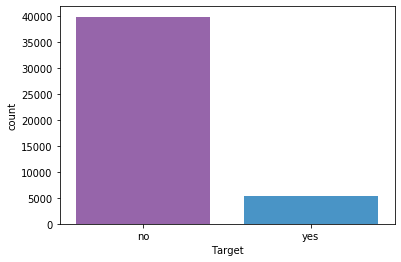

In [19]:
# Lets see response distribution for target column
print(df_main['Target'].value_counts())

sns.countplot(x='Target',data=df_original)

# Here we have a kind of improper data, what ever model we build would 
# be dominated by column have strong hold on `NO` on output variable becuase we see that data come from the range where
# most of the people have not opted for Term Deposit

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0633313cd0>,
      dtype=object)

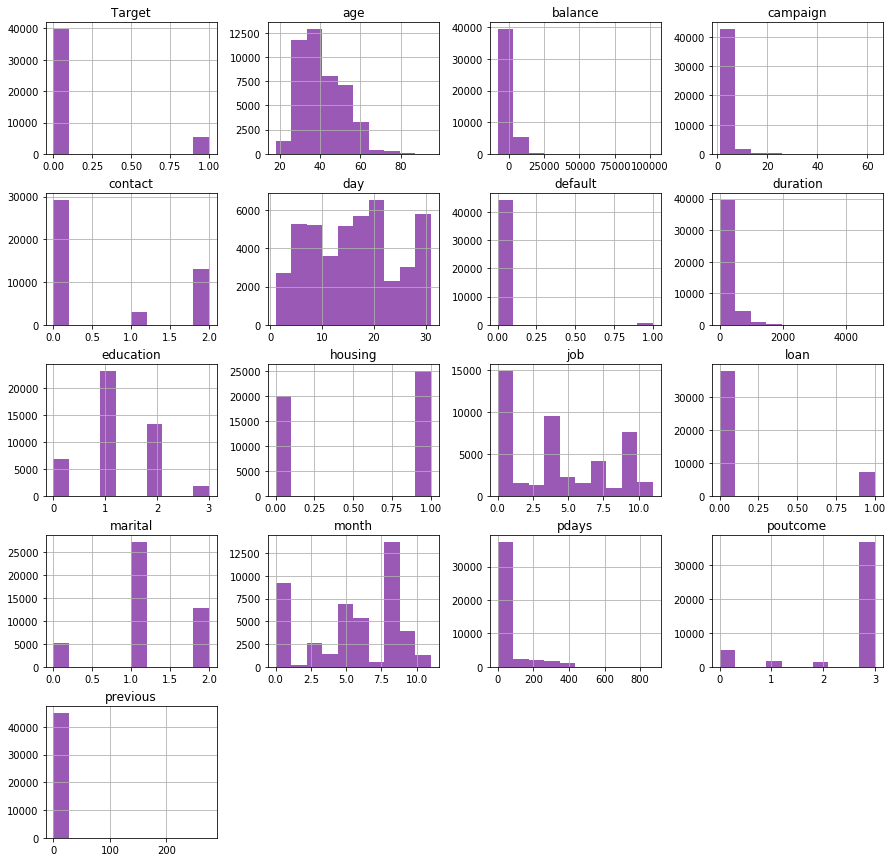

In [20]:
# Histogram
df_main.hist(figsize=(15,15))

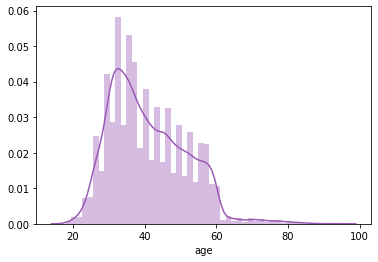

In [21]:
sns.distplot(df_main['age'],kde=True)

# We can conclude that data set has people raning from 20-60 and there are some outliers present as well
# becuase the tail on right is spreading a little more

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


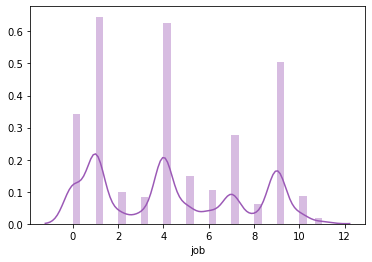

In [22]:
sns.distplot(df_main['job'])
# Looking at the graph we see that are multiple groups present in here, we have seen this and converted to categorical variable
# lets print it from cached map `col`umnEncoders`
print(columnEncoders['job'].classes_)

management


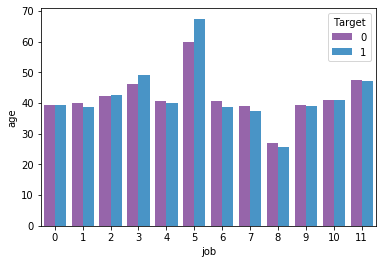

In [23]:
# Relation between age, job to Term deposit
sns.barplot('job','age',hue='Target',data=df_main,ci=None)
print(columnEncoders['job'].classes_[4])

# We can see that management people have opted for term deposit more

In [24]:
# Finding relation between job and term deposit
pd.crosstab(df_original['job'], df_original['Target'])

# We here conclude that management, technician, blue-collar are some of the categories that tend to apply for term deposit.
# This conclusion is based on that fact that their earning is on higher side. A general human assumption.

Target           no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

['primary' 'secondary' 'tertiary' 'unknown']


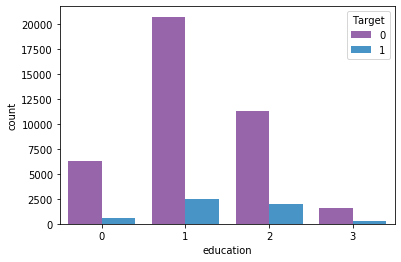

In [25]:
# Lets analyse education-wise which category tend to apply more for term deposit respectively
sns.countplot(x='education', hue='Target',data=df_main)
print(columnEncoders['education'].classes_)

# Here we conclude that the order of applyterm deposit secondary > tertiary > primary > unknown

['divorced' 'married' 'single']


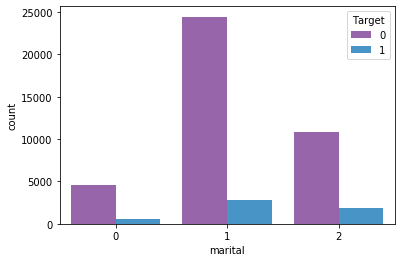

In [26]:
# Lets analyse marital-status-wise which category tend to apply more for term deposit respectively

sns.countplot(x='marital', hue='Target',data=df_main)#

print(columnEncoders['marital'].classes_)

# Here we conclude that the order of applyterm deposit is in married > single > divorced

In [27]:
pd.crosstab(df_original['Target'], df_original['month'])

# We see here
# - May has higher success and failure of Target values
# - August has the second highest acceptanec value
# But in terms of percentage acceptance august has higher value than may.

month    apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
Target                                                                     
no      2355  5559  114  2208  1261  6268  4795  229  12841  3567  415  310
yes      577   688  100   441   142   627   546  248    925   403  323  269

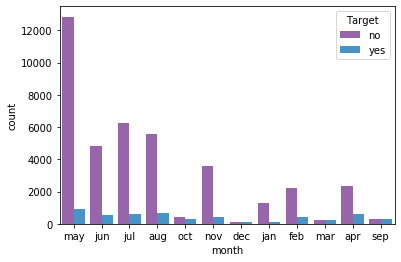

In [28]:
# Deposit by months visual
sns.countplot(x='month', hue='Target',data=df_original)

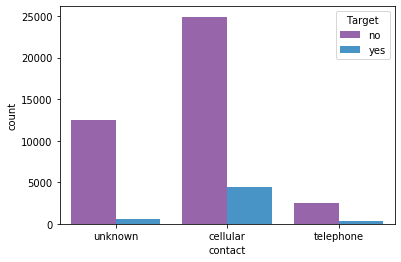

In [29]:
# Checking if people who have given contants have got term deposit
sns.countplot(x='contact', hue='Target',data=df_original)

# This indicated who have registerd cellular contacts have slightly higer rate of applying for term deposit
# This again tell us people who are working in higher job profile like management, technicians

In [30]:

# Converting duration in dataset which is in seconds to minutes upto decimal ot 2 digits
decimal_points = 2
df_main['duration'] = df_main['duration'] / 60
df_main['duration'] = df_main['duration'].apply(lambda x: round(x, decimal_points))

df_main.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8      4.35         1     -1         0         3       0  
1    5      8      2.52         1     -1         0         3       0  
2    5      8      1.27         1     -1         0         3       0  
3    5      8      1.53         1     -1         0         3       0  
4    5      8      3.30         1     -1         0         3       0

In [31]:
# Balance colums seems to be dominating all other values lets scale it
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_main[['balance']] = scaler.fit_transform(df_main[['balance']])

In [32]:
# Looking closely at our columns we see some columns prefixed with char `p`, reading from the problem
# statement we came to know that these field are some kind of indicated of previous analysis or campaign 
# like poutcome is not neccessarily should be part of train data model becuase this is not an attribute on input
# but a conclusion on the previous analysis/campaign

# So we can even build our data model removing these `p{x}` columns
df_main.head()

age  job  marital  education  default   balance  housing  loan  contact  \
0   58    4        1          2        0  0.092259        1     0        2   
1   44    9        2          1        0  0.073067        1     0        2   
2   33    2        1          1        0  0.072822        1     1        2   
3   47    1        1          3        0  0.086476        1     0        2   
4   33   11        2          3        0  0.072812        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8      4.35         1     -1         0         3       0  
1    5      8      2.52         1     -1         0         3       0  
2    5      8      1.27         1     -1         0         3       0  
3    5      8      1.53         1     -1         0         3       0  
4    5      8      3.30         1     -1         0         3       0

In [33]:
df_main.describe().transpose()

count       mean         std   min        25%        50%  \
age        45211.0  40.936210   10.618762  18.0  33.000000  39.000000   
job        45211.0   4.339762    3.272657   0.0   1.000000   4.000000   
marital    45211.0   1.167725    0.608230   0.0   1.000000   1.000000   
education  45211.0   1.224813    0.747997   0.0   1.000000   1.000000   
default    45211.0   0.018027    0.133049   0.0   0.000000   0.000000   
balance    45211.0   0.085171    0.027643   0.0   0.073457   0.076871   
housing    45211.0   0.555838    0.496878   0.0   0.000000   1.000000   
loan       45211.0   0.160226    0.366820   0.0   0.000000   0.000000   
contact    45211.0   0.640242    0.897951   0.0   0.000000   0.000000   
day        45211.0  15.806419    8.322476   1.0   8.000000  16.000000   
month      45211.0   5.523014    3.006911   0.0   3.000000   6.000000   
duration   45211.0   4.302729    4.292132   0.0   1.720000   3.000000   
campaign   45211.0   2.763841    3.098021   1.0   1.000000   2.000000   
pdays      45211.0  40.197828  100.128746  -1.0  -1.000000  -1.000000   
previous   45211.0   0.580323    2.303441   0.0   0.000000   0.000000   
poutcome   45211.0   2.559974    0.989059   0.0   3.000000   3.000000   
Target     45211.0   0.116985    0.321406   0.0   0.000000   0.000000   

                 75%     max  
age        48.000000   95.00  
job         7.000000   11.00  
marital     2.000000    2.00  
education   2.000000    3.00  
default     0.000000    1.00  
balance     0.085768    1.00  
housing     1.000000    1.00  
loan        0.000000    1.00  
contact     2.000000    2.00  
day        21.000000   31.00  
month       8.000000   11.00  
duration    5.320000   81.97  
campaign    3.000000   63.00  
pdays      -1.000000  871.00  
previous    0.000000  275.00  
poutcome    3.000000    3.00  
Target      0.000000    1.00

In [34]:
df_main.corr()

age       job   marital  education   default   balance  \
age        1.000000 -0.021868 -0.403240  -0.106807 -0.017879  0.097783   
job       -0.021868  1.000000  0.062045   0.166707 -0.006853  0.018232   
marital   -0.403240  0.062045  1.000000   0.108576 -0.007023  0.002122   
education -0.106807  0.166707  0.108576   1.000000 -0.010718  0.064514   
default   -0.017879 -0.006853 -0.007023  -0.010718  1.000000 -0.066745   
balance    0.097783  0.018232  0.002122   0.064514 -0.066745  1.000000   
housing   -0.185513 -0.125363 -0.016096  -0.090790 -0.006025 -0.068768   
loan      -0.015655 -0.033004 -0.046893  -0.048574  0.077234 -0.084350   
contact    0.026221 -0.082063 -0.039201  -0.110928  0.015404 -0.027273   
day       -0.009120  0.022856 -0.005261   0.022671  0.009424  0.004503   
month     -0.042357 -0.092870 -0.006991  -0.057304  0.011486  0.019777   
duration  -0.004648  0.004747  0.011849   0.001936 -0.010021  0.021564   
campaign   0.004760  0.006839 -0.008994   0.006255  0.016822 -0.014578   
pdays     -0.023758 -0.024455  0.019172   0.000052 -0.029979  0.003435   
previous   0.001288 -0.000911  0.014973   0.017570 -0.018329  0.016674   
poutcome   0.007367  0.011010 -0.016850  -0.019361  0.034898 -0.020967   
Target     0.025155  0.040438  0.045588   0.066241 -0.022419  0.052838   

            housing      loan   contact       day     month  duration  \
age       -0.185513 -0.015655  0.026221 -0.009120 -0.042357 -0.004648   
job       -0.125363 -0.033004 -0.082063  0.022856 -0.092870  0.004747   
marital   -0.016096 -0.046893 -0.039201 -0.005261 -0.006991  0.011849   
education -0.090790 -0.048574 -0.110928  0.022671 -0.057304  0.001936   
default   -0.006025  0.077234  0.015404  0.009424  0.011486 -0.010021   
balance   -0.068768 -0.084350 -0.027273  0.004503  0.019777  0.021564   
housing    1.000000  0.041323  0.188123 -0.027982  0.271481  0.005075   
loan       0.041323  1.000000 -0.010873  0.011370  0.022145 -0.012408   
contact    0.188123 -0.010873  1.000000 -0.027936  0.361145 -0.020838   
day       -0.027982  0.011370 -0.027936  1.000000 -0.006028 -0.030209   
month      0.271481  0.022145  0.361145 -0.006028  1.000000  0.006311   
duration   0.005075 -0.012408 -0.020838 -0.030209  0.006311  1.000000   
campaign  -0.023599  0.009980  0.019614  0.162490 -0.110031 -0.084569   
pdays      0.124178 -0.022754 -0.244816 -0.093044  0.033065 -0.001569   
previous   0.037076 -0.011043 -0.147811 -0.051710  0.022727  0.001205   
poutcome  -0.099971  0.015458  0.272214  0.083460 -0.033038  0.010926   
Target    -0.139173 -0.068185 -0.148395 -0.028348 -0.024471  0.394521   

           campaign     pdays  previous  poutcome    Target  
age        0.004760 -0.023758  0.001288  0.007367  0.025155  
job        0.006839 -0.024455 -0.000911  0.011010  0.040438  
marital   -0.008994  0.019172  0.014973 -0.016850  0.045588  
education  0.006255  0.000052  0.017570 -0.019361  0.066241  
default    0.016822 -0.029979 -0.018329  0.034898 -0.022419  
balance   -0.014578  0.003435  0.016674 -0.020967  0.052838  
housing   -0.023599  0.124178  0.037076 -0.099971 -0.139173  
loan       0.009980 -0.022754 -0.011043  0.015458 -0.068185  
contact    0.019614 -0.244816 -0.147811  0.272214 -0.148395  
day        0.162490 -0.093044 -0.051710  0.083460 -0.028348  
month     -0.110031  0.033065  0.022727 -0.033038 -0.024471  
duration  -0.084569 -0.001569  0.001205  0.010926  0.394521  
campaign   1.000000 -0.088628 -0.032855  0.101588 -0.073172  
pdays     -0.088628  1.000000  0.454820 -0.858362  0.103621  
previous  -0.032855  0.454820  1.000000 -0.489752  0.093236  
poutcome   0.101588 -0.858362 -0.489752  1.000000 -0.077840  
Target    -0.073172  0.103621  0.093236 -0.077840  1.000000

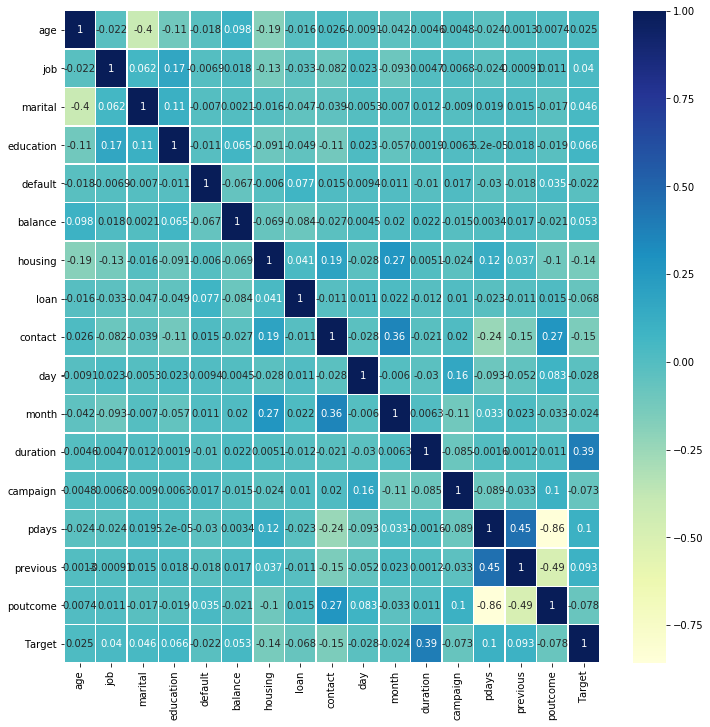

In [35]:
corr = df_main.corr()
plt.figure(figsize = (12,12))

sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")#, cbar=False)

# Here we can simply reduce poutcome, pdays, previous, campaig

## Training constants and general imports

In [36]:

# Training constants and general imports

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier



from sklearn import metrics
from sklearn.metrics import classification_report

# taking 70:30 training and test set
test_size = 0.30 

# Random number seeding for reapeatability of the code
seed = 2 # spirit and opportunity Mars exploration rovers


def isqrt(n):
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2
    return x

## Data Preparation

In [37]:
## Prepare input columns
df_main_x = df_main.copy()

# Colums we are dropping which are mostly related to previous campaign
df_main_x = df_main_x.drop(['poutcome', 'duration', 'Target'], axis = 1) 

# df_main_x_ary = np.asarray(df_main_x)

df_main_y = df_original['Target']


df_main_x.head()


age  job  marital  education  default   balance  housing  loan  contact  \
0   58    4        1          2        0  0.092259        1     0        2   
1   44    9        2          1        0  0.073067        1     0        2   
2   33    2        1          1        0  0.072822        1     1        2   
3   47    1        1          3        0  0.086476        1     0        2   
4   33   11        2          3        0  0.072812        0     0        2   

   day  month  campaign  pdays  previous  
0    5      8         1     -1         0  
1    5      8         1     -1         0  
2    5      8         1     -1         0  
3    5      8         1     -1         0  
4    5      8         1     -1         0

In [38]:
## Target column seperate
df_main_y.head()

0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object

## Training

In [39]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(np.asarray(df_main_x), np.asarray(df_main_y), test_size=test_size, random_state=seed)        


In [40]:
# Holder class for data from different classifiers
class EnsembleTechnique:
    def __init__(self, score, prediction, accuracy, confusion_matrix, classification_report, n_estimators):
        self.score = score
        self.prediction = prediction
        self.accuracy = accuracy
        self.confusion_matrix = confusion_matrix
        self.classification_report = classification_report
        self.n_estimators = n_estimators

In [41]:
rows = df_main_x.shape[0]
print("Total rows {}".format(rows))
maxLimit = isqrt(rows)
print("Limit till we find Nestimators {}".format(maxLimit))

# Result map to hold name and score for each model
results = {}
    

Total rows 45211
Limit till we find Nestimators 212


## Decision Tree using `entropy model`

In [42]:
#Init
decisionTreeClassifier = DecisionTreeClassifier(criterion = 'entropy')

#fit data
decisionTreeClassifier.fit(X_train, y_train)

#Predict
dtc_y_pred = decisionTreeClassifier.predict(X_test)

# Model score
dtc_model_score = decisionTreeClassifier.score(X_test , y_test)

# Accuracy
dtc_model_accuracy = metrics.accuracy_score(y_test, dtc_y_pred)


print("Prediction: {}".format(dtc_y_pred))
print("Score: {}".format(dtc_model_score))
print("Accuracy {}".format(dtc_model_accuracy))
print("Confusion metrix")
print(metrics.confusion_matrix(y_test, dtc_y_pred))
print(classification_report(y_test,dtc_y_pred))

results['Decision Tree'] = dtc_model_score

Prediction: ['no' 'no' 'no' ... 'no' 'no' 'no']
Score: 0.8261574756708936
Accuracy 0.8261574756708936
Confusion metrix
[[10738  1261]
 [ 1097   468]]
              precision    recall  f1-score   support

          no       0.91      0.89      0.90     11999
         yes       0.27      0.30      0.28      1565

    accuracy                           0.83     13564
   macro avg       0.59      0.60      0.59     13564
weighted avg       0.83      0.83      0.83     13564



## Random Forest Classifier

In [43]:

# determining n_estimators here, we should proceed with approach 2^n
# before stopping at the best outcome we should compare the result of previous outcome
previous = EnsembleTechnique(0.0, 0.0, 0.0, None, None, 0)

counter = 1;
estimator = 0
while(estimator<maxLimit):

    estimator = pow(2, counter)
    counter = counter + 1
    
    
    #print("Estimating {}".format(estimator))
    
    #Init
    randomForestClassifier = RandomForestClassifier(n_estimators=estimator)
    #fit data
    randomForestClassifier.fit(X_train, y_train)

    #Predict
    rfc_y_pred = randomForestClassifier.predict(X_test)

    # Model score
    rfc_model_score = randomForestClassifier.score(X_test , y_test)

    # Accuracy
    rfc_model_accuracy = metrics.accuracy_score(y_test, rfc_y_pred)
    #print("Score {} for e {}".format(rfc_model_score, estimator))
    #print(rfc_model_score)
    if rfc_model_score > previous.score:
        previous = EnsembleTechnique(rfc_model_score, rfc_y_pred, rfc_model_accuracy,
                                    metrics.confusion_matrix(y_test, rfc_y_pred),
                                    classification_report(y_test,rfc_y_pred), 
                                    estimator)
        
    
        
    

print("Prediction: {}".format(previous.prediction))
print("Score: {}".format(previous.score))
print("Accuracy {}".format(previous.accuracy))
print("n estimators : {}".format(previous.n_estimators))
print("Confusion metrix")
print(previous.confusion_matrix)
print(previous.classification_report)

results['Random Forest'] = previous.score

Prediction: ['no' 'no' 'no' ... 'no' 'no' 'no']
Score: 0.8882335594219994
Accuracy 0.8882335594219994
n estimators : 128
Confusion metrix
[[11775   224]
 [ 1292   273]]
              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11999
         yes       0.55      0.17      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



## Adaboost Classifier

In [44]:

previous = EnsembleTechnique(0.0, 0.0, 0.0, None, None, 0)

counter = 1;
estimator = 0
while(estimator<maxLimit):

    estimator = pow(2, counter)
    counter = counter + 1
    #Init
    adaBoostClassifier = AdaBoostClassifier(n_estimators=estimator)
    #fit data
    adaBoostClassifier.fit(X_train, y_train)

    #Predict
    abc_y_pred = adaBoostClassifier.predict(X_test)

    # Model score
    abc_model_score = adaBoostClassifier.score(X_test , y_test)

    # Accuracy
    abc_model_accuracy = metrics.accuracy_score(y_test, abc_y_pred)
    
    if abc_model_score > previous.score:
        previous = EnsembleTechnique(abc_model_score, abc_y_pred, abc_model_accuracy,
                                    metrics.confusion_matrix(y_test, abc_y_pred),
                                    classification_report(y_test, abc_y_pred), 
                                    estimator)
    
    
    
    

print("Prediction: {}".format(previous.prediction))
print("Score: {}".format(previous.score))
print("Accuracy {}".format(previous.accuracy))
print("n estimators : {}".format(previous.n_estimators))
print("Confusion metrix")
print(previous.confusion_matrix)
print(previous.classification_report)

results['Adaboost Classifier'] = previous.score

Prediction: ['no' 'no' 'no' ... 'no' 'no' 'no']
Score: 0.8882335594219994
Accuracy 0.8882335594219994
n estimators : 256
Confusion metrix
[[11847   152]
 [ 1364   201]]
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     11999
         yes       0.57      0.13      0.21      1565

    accuracy                           0.89     13564
   macro avg       0.73      0.56      0.57     13564
weighted avg       0.86      0.89      0.86     13564



## Bagging Classifier

In [45]:


previous = EnsembleTechnique(0.0, 0.0, 0.0, None, None, 0)

counter = 1;
estimator = 0
while(estimator<maxLimit):

    estimator = pow(2, counter)
    counter = counter + 1
    #Init
    baggingClassifier = BaggingClassifier(n_estimators=estimator, max_samples= .7, bootstrap=True)
    #fit data
    baggingClassifier.fit(X_train, y_train)

    #Predict
    bc_y_pred = baggingClassifier.predict(X_test)

    # Model score
    bc_model_score = baggingClassifier.score(X_test , y_test)

    # Accuracy
    bc_model_accuracy = metrics.accuracy_score(y_test, bc_y_pred)
    print("{} for n estimator {}".format(bc_model_score, estimator))
    if bc_model_score > previous.score:
        previous = EnsembleTechnique(bc_model_score, bc_y_pred, bc_model_accuracy,
                                    metrics.confusion_matrix(y_test, bc_y_pred),
                                    classification_report(y_test, bc_y_pred), 
                                    estimator) 

    
        
        
results['Bagging Classifier'] = previous.score 
print("Prediction: {}".format(previous.prediction))
print("Score: {}".format(previous.score))
print("Accuracy {}".format(previous.accuracy))
print("n estimators : {}".format(previous.n_estimators))
print("Confusion metrix")
print(previous.confusion_matrix)
print(previous.classification_report)


0.8773223237982896 for n estimator 2
0.8773960483633146 for n estimator 4
0.8824093187850192 for n estimator 8
0.8850634031259216 for n estimator 16
0.8866116189914479 for n estimator 32
0.8859480979062223 for n estimator 64
0.8872014155116484 for n estimator 128
0.8858006487761723 for n estimator 256
Prediction: ['no' 'no' 'no' ... 'no' 'no' 'no']
Score: 0.8872014155116484
Accuracy 0.8872014155116484
n estimators : 128
Confusion metrix
[[11684   315]
 [ 1215   350]]
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     11999
         yes       0.53      0.22      0.31      1565

    accuracy                           0.89     13564
   macro avg       0.72      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



## Gradient Boost Classifier

In [46]:

previous = EnsembleTechnique(0.0, 0.0, 0.0, None, None, 0)

counter = 1;
estimator = 0
while(estimator<maxLimit):

    estimator = pow(2, counter)
    counter = counter + 1
    #Init
    gradientBoostClassifier = GradientBoostingClassifier(n_estimators=estimator, learning_rate = 0.05)
    #fit data
    gradientBoostClassifier.fit(X_train, y_train)

    #Predict
    gb_y_pred = gradientBoostClassifier.predict(X_test)

    # Model score
    gb_model_score = gradientBoostClassifier.score(X_test , y_test)

    # Accuracy
    gb_model_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
    
    #print("{} for n estimator {}".format(bc_model_score, estimator))
    if gb_model_score > previous.score:
        previous = EnsembleTechnique(gb_model_score, gb_y_pred, gb_model_accuracy,
                                    metrics.confusion_matrix(y_test,gb_y_pred),
                                    classification_report(y_test, gb_y_pred), 
                                    estimator) 


results['Gradient Boost Classifier'] = previous.score 
print("Prediction: {}".format(previous.prediction))
print("Score: {}".format(previous.score))
print("Accuracy {}".format(previous.accuracy))
print("n estimators : {}".format(previous.n_estimators))
print("Confusion metrix")
print(previous.confusion_matrix)
print(previous.classification_report)

/home/ashish/installed_apps/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction: ['no' 'no' 'no' ... 'no' 'no' 'no']
Score: 0.8904452963727514
Accuracy 0.8904452963727514
n estimators : 256
Confusion metrix
[[11804   195]
 [ 1291   274]]
              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11999
         yes       0.58      0.18      0.27      1565

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



## Analysis Result

In [47]:

print("Model score are ")
print(results)

best_score = max(results, key=results.get);

resultString = " has best score with accuracy **{}** ".format(results[best_score])

printTextAsMarkdown(best_score, resultString, color="blue")

Model score are 
{'Decision Tree': 0.8261574756708936, 'Random Forest': 0.8882335594219994, 'Adaboost Classifier': 0.8882335594219994, 'Bagging Classifier': 0.8872014155116484, 'Gradient Boost Classifier': 0.8904452963727514}


**<span style='color:blue'>Gradient Boost Classifier</span>** :  has best score with accuracy **0.8904452963727514** 

## Analysis Report

Recall: Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.

Precision: Means how sure is the prediction of our model that the actual label is a "Yes".

Decision tree will not yield the best result as it is based on all the individual attributes where as Random Forest would random pic the colums and would aggregate result. **Random forest** would always perform best in accuracy. But **Gradient Boost Classifier** accuracy is incremental. Each new tree would be better than the previous one. In terms of performance, Random Forest beats Gradient Boost CLassifier due to parallel nature of execution where in Gradient Boost work sequentially.

For the analysis it is clear that Gradient Boost Classifier give the best model score. We have also seen that number of trees also should be in certain range too less or many would not yield proper result.